In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression


In [3]:
df = pd.read_csv('production and pressure data.csv')

In [4]:
df

,Unnamed: 0,Oil Production,Date,Pressure
0,0,8045.2,2005-01-01,353.5
1,1,9243.7,2005-02-01,426.8
2,2,7498.1,2005-03-01,313.4
3,3,6840.4,2005-04-01,362.5
4,4,6470.0,2005-05-01,456.1
...,...,...,...,...
56,56,727.9,2009-09-01,105.1
57,57,797.7,2009-10-01,119.9
58,58,685.8,2009-11-01,103.0
59,59,675.3,2009-12-01,105.2


In [5]:
df.index = pd.to_datetime(df["Date"])
df= df.drop("Unnamed: 0",axis=1)

In [6]:
df

,Oil Production,Date,Pressure
Date,,,
2005-01-01,8045.2,2005-01-01,353.5
2005-02-01,9243.7,2005-02-01,426.8
2005-03-01,7498.1,2005-03-01,313.4
2005-04-01,6840.4,2005-04-01,362.5
2005-05-01,6470.0,2005-05-01,456.1
...,...,...,...
2009-09-01,727.9,2009-09-01,105.1
2009-10-01,797.7,2009-10-01,119.9
2009-11-01,685.8,2009-11-01,103.0


In [7]:
df = df[["Oil Production","Pressure"]]

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

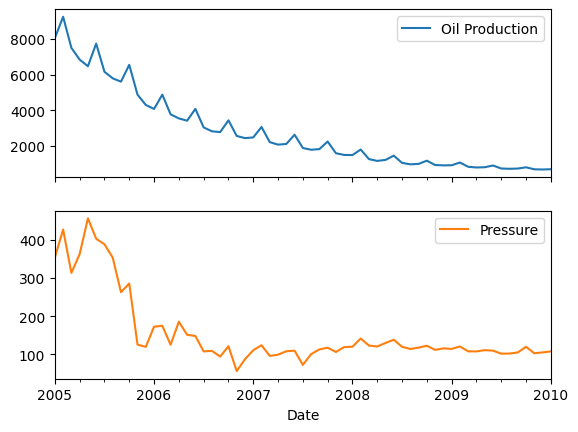

In [8]:
df.plot(subplots=True)

In [9]:
data = df[["Oil Production"]]

<AxesSubplot: xlabel='Date'>

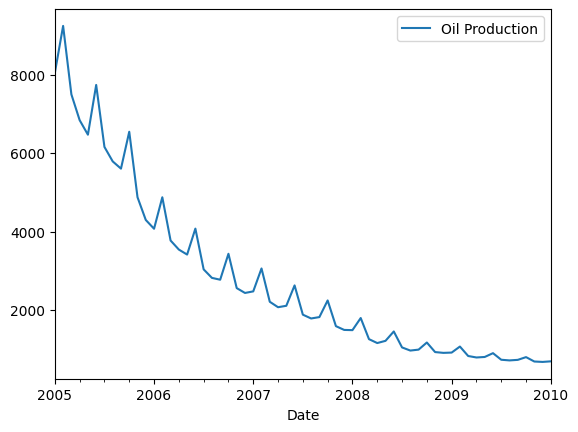

In [10]:
data.plot()

In [12]:
data[40:]

,Oil Production
Date,
2008-05-01,1213.1
2008-06-01,1452.0
2008-07-01,1044.9
2008-08-01,965.1
2008-09-01,988.9
2008-10-01,1170.4
2008-11-01,926.4
2008-12-01,906.3
2009-01-01,913.5


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

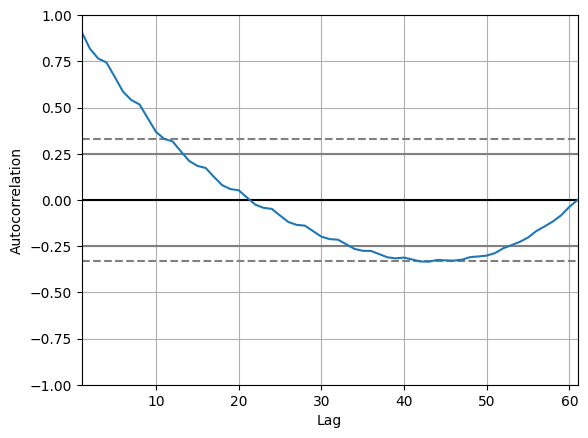

In [13]:
pd.plotting.autocorrelation_plot(data)

In [15]:
data

,Oil Production
Date,
2005-01-01,8045.2
2005-02-01,9243.7
2005-03-01,7498.1
2005-04-01,6840.4
2005-05-01,6470.0
...,...
2009-09-01,727.9
2009-10-01,797.7
2009-11-01,685.8


In [16]:
data["yt-1"] = data.shift()["Oil Production"]

In [17]:
data

,Oil Production,yt-1
Date,,
2005-01-01,8045.2,NaN
2005-02-01,9243.7,8045.2
2005-03-01,7498.1,9243.7
2005-04-01,6840.4,7498.1
2005-05-01,6470.0,6840.4
...,...,...
2009-09-01,727.9,713.9
2009-10-01,797.7,727.9
2009-11-01,685.8,797.7


In [18]:
data["Oil Production"].shift(2)

Date
2005-01-01       NaN
2005-02-01       NaN
2005-03-01    8045.2
2005-04-01    9243.7
2005-05-01    7498.1
               ...  
2009-09-01     730.7
2009-10-01     713.9
2009-11-01     727.9
2009-12-01     797.7
2010-01-01     685.8
Name: Oil Production, Length: 61, dtype: float64

In [19]:
data["yt-2"] = data["Oil Production"].shift(2)

In [20]:
data

,Oil Production,yt-1,yt-2
Date,,,
2005-01-01,8045.2,NaN,NaN
2005-02-01,9243.7,8045.2,NaN
2005-03-01,7498.1,9243.7,8045.2
2005-04-01,6840.4,7498.1,9243.7
2005-05-01,6470.0,6840.4,7498.1
...,...,...,...
2009-09-01,727.9,713.9,730.7
2009-10-01,797.7,727.9,713.9
2009-11-01,685.8,797.7,727.9


In [21]:
data["yt-3"] = data["Oil Production"].shift(3)

In [22]:
data 

,Oil Production,yt-1,yt-2,yt-3
Date,,,,
2005-01-01,8045.2,NaN,NaN,NaN
2005-02-01,9243.7,8045.2,NaN,NaN
2005-03-01,7498.1,9243.7,8045.2,NaN
2005-04-01,6840.4,7498.1,9243.7,8045.2
2005-05-01,6470.0,6840.4,7498.1,9243.7
...,...,...,...,...
2009-09-01,727.9,713.9,730.7,898.6
2009-10-01,797.7,727.9,713.9,730.7
2009-11-01,685.8,797.7,727.9,713.9


In [31]:
# Sample input data
X = data[["yt-1","yt-2","yt-3"]][3:]
y = data[['Oil Production']][3:]


## Linear Regression Model

In [32]:
model = LinearRegression()


In [33]:
X

,yt-1,yt-2,yt-3
Date,,,
2005-04-01,7498.1,9243.7,8045.2
2005-05-01,6840.4,7498.1,9243.7
2005-06-01,6470.0,6840.4,7498.1
2005-07-01,7738.3,6470.0,6840.4
2005-08-01,6157.6,7738.3,6470.0
2005-09-01,5788.6,6157.6,7738.3
2005-10-01,5604.2,5788.6,6157.6
2005-11-01,6545.3,5604.2,5788.6
2005-12-01,4874.4,6545.3,5604.2


In [34]:
#train the model 

model.fit(X,y)

LinearRegression()

In [35]:
y_pred = model.predict(X)

In [36]:
y_pred

array([[7078.57905622],
       [7032.81801327],
       [6188.18970874],
       [6442.51527481],
       [5795.3131817 ],
       [5912.89277273],
       [5236.29337824],
       [5477.18381245],
       [4821.52383407],
       [4725.98895055],
       [3977.49725785],
       [4082.14564327],
       [3633.58843164],
       [3697.61464221],
       [3229.00556399],
       [3408.70231153],
       [3005.08443247],
       [3032.18179204],
       [2621.33177947],
       [2814.61972082],
       [2507.72649623],
       [2591.81290219],
       [2285.51455618],
       [2489.62970235],
       [2215.48829117],
       [2269.15802555],
       [1968.74478269],
       [2140.26027892],
       [1900.6178856 ],
       [1960.29927152],
       [1700.38077422],
       [1846.78257608],
       [1633.72730298],
       [1670.29594229],
       [1425.57670763],
       [1519.60212818],
       [1327.86931913],
       [1335.37220564],
       [1157.43607724],
       [1228.12349178],
       [1105.29087121],
       [1110.913

In [38]:
y

,Oil Production
Date,
2005-04-01,6840.4
2005-05-01,6470.0
2005-06-01,7738.3
2005-07-01,6157.6
2005-08-01,5788.6
2005-09-01,5604.2
2005-10-01,6545.3
2005-11-01,4874.4
2005-12-01,4295.5


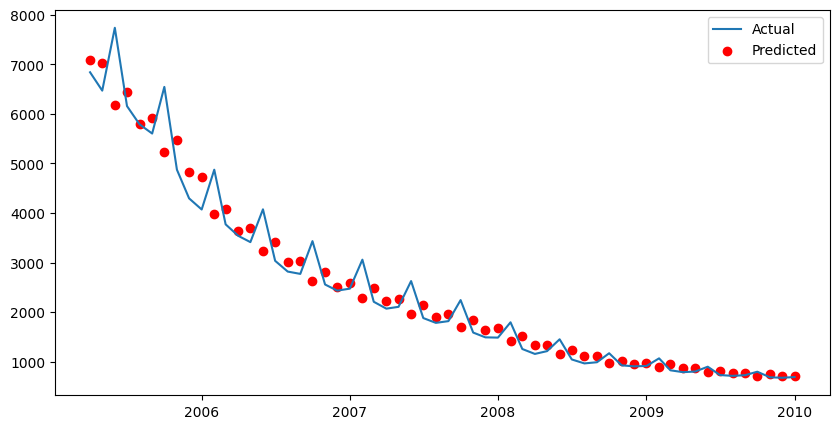

In [44]:
plt.figure(figsize=(10,5))
plt.plot(y.index,y,label="Actual")
plt.scatter(y.index,y_pred,label="Predicted",c="red")
plt.legend()


# Forecasting in future

In [23]:
data

,Oil Production,yt-1,yt-2,yt-3
Date,,,,
2005-01-01,8045.2,NaN,NaN,NaN
2005-02-01,9243.7,8045.2,NaN,NaN
2005-03-01,7498.1,9243.7,8045.2,NaN
2005-04-01,6840.4,7498.1,9243.7,8045.2
2005-05-01,6470.0,6840.4,7498.1,9243.7
...,...,...,...,...
2009-09-01,727.9,713.9,730.7,898.6
2009-10-01,797.7,727.9,713.9,730.7
2009-11-01,685.8,797.7,727.9,713.9


In [24]:
y

NameError: name 'y' is not defined

In [50]:
#1st time in future , yt is unknown

yt,yt1,yt2,_ =  data.iloc[-1]

In [51]:
yt

690.2

In [52]:
yt1

675.3

In [53]:
yt2

685.8

In [54]:
df

,Oil Production,Pressure
Date,,
2005-01-01,8045.2,353.5
2005-02-01,9243.7,426.8
2005-03-01,7498.1,313.4
2005-04-01,6840.4,362.5
2005-05-01,6470.0,456.1
...,...,...
2009-09-01,727.9,105.1
2009-10-01,797.7,119.9
2009-11-01,685.8,103.0


In [55]:
yf = model.predict([[yt,yt1,yt2]])

d:\miniconda3\envs\edv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [59]:
forecast = []

In [60]:
forecast.append(yf[0][0])

In [61]:
n = 1

while n < 10:
    yt,yt1,yt2,_ =  yf[0][0],yt,yt1,yt2
    yf = model.predict([[yt,yt1,yt2]])
    forecast.append(yf[0][0])
    print(yf[0])
    n += 1

[679.87258278]
[682.61777667]
[681.19314019]
[679.32471953]
[679.35719073]
[678.65825212]
[677.71064673]
[677.24928903]
[676.704162]


d:\miniconda3\envs\edv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\miniconda3\envs\edv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\miniconda3\envs\edv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\miniconda3\envs\edv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\miniconda3\envs\edv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
d:\miniconda3\envs\edv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid fea

In [62]:
forecast

[684.3509401834791,
 679.8725827839476,
 682.6177766723163,
 681.1931401914086,
 679.3247195313057,
 679.3571907270192,
 678.6582521169544,
 677.7106467321539,
 677.2492890280228,
 676.7041619988875]

In [72]:
y.index[-1]+pd.DateOffset(days=-1)

Timestamp('2009-12-31 00:00:00')

In [74]:
y.index[-1]+pd.DateOffset(days=-1)

Timestamp('2009-12-31 00:00:00')

In [77]:
date_forec = pd.date_range(start=y.index[-1],periods=10,freq="M").shift(1,freq="D")

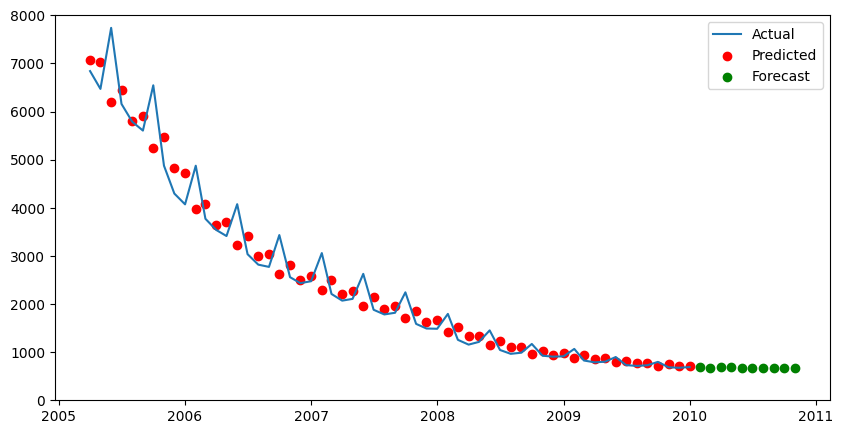

In [80]:
plt.figure(figsize=(10,5))
plt.plot(y.index,y,label="Actual")
plt.scatter(y.index,y_pred,label="Predicted",c="red")
plt.scatter(date_forec,forecast,label="Forecast",c="green")
plt.ylim(0,8000)
plt.legend()

## Running multiple Modles

In [25]:
data 

,Oil Production,yt-1,yt-2,yt-3
Date,,,,
2005-01-01,8045.2,NaN,NaN,NaN
2005-02-01,9243.7,8045.2,NaN,NaN
2005-03-01,7498.1,9243.7,8045.2,NaN
2005-04-01,6840.4,7498.1,9243.7,8045.2
2005-05-01,6470.0,6840.4,7498.1,9243.7
...,...,...,...,...
2009-09-01,727.9,713.9,730.7,898.6
2009-10-01,797.7,727.9,713.9,730.7
2009-11-01,685.8,797.7,727.9,713.9


In [26]:
data= data.dropna()

In [27]:
data 

,Oil Production,yt-1,yt-2,yt-3
Date,,,,
2005-04-01,6840.4,7498.1,9243.7,8045.2
2005-05-01,6470.0,6840.4,7498.1,9243.7
2005-06-01,7738.3,6470.0,6840.4,7498.1
2005-07-01,6157.6,7738.3,6470.0,6840.4
2005-08-01,5788.6,6157.6,7738.3,6470.0
2005-09-01,5604.2,5788.6,6157.6,7738.3
2005-10-01,6545.3,5604.2,5788.6,6157.6
2005-11-01,4874.4,6545.3,5604.2,5788.6
2005-12-01,4295.5,4874.4,6545.3,5604.2


In [28]:
import pycaret 

In [29]:
pycaret.__version__

'3.2.0'

In [30]:
import joblib



In [31]:
from pycaret.regression import *
s = setup(data, target = 'Oil Production',session_id=123)

,Description,Value
0,Session id,123
1,Target,Oil Production
2,Target type,Regression
3,Original data shape,"(58, 4)"
4,Transformed data shape,"(58, 4)"
5,Transformed train set shape,"(40, 4)"
6,Transformed test set shape,"(18, 4)"
7,Numeric features,3
8,Preprocess,True
9,Imputation type,simple


In [33]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,258.3890,228083.6740,371.6009,0.9199,0.1362,0.0966,0.0130
br,Bayesian Ridge,322.4471,234372.1446,418.4366,0.9036,0.1355,0.1186,0.0110
lr,Linear Regression,328.3250,242718.5349,428.7119,0.8988,0.1359,0.1191,0.6670
lasso,Lasso Regression,328.3244,242718.4072,428.7120,0.8988,0.1359,0.1191,0.2850
ridge,Ridge Regression,328.3251,242718.5854,428.7119,0.8988,0.1359,0.1191,0.0100
en,Elastic Net,328.3249,242718.6008,428.7121,0.8988,0.1359,0.1191,0.0120
lar,Least Angle Regression,328.3253,242718.8087,428.7122,0.8988,0.1359,0.1191,0.0090
llar,Lasso Least Angle Regression,328.3251,242718.6837,428.7120,0.8988,0.1359,0.1191,0.0090
rf,Random Forest Regressor,380.3428,277095.7804,483.7314,0.8582,0.1765,0.1590,0.0440
par,Passive Aggressive Regressor,398.9974,395346.6055,545.8095,0.8469,0.1793,0.1525,0.0110


In [34]:
best = create_model("rf")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,245.1835,79420.2453,281.8160,0.9418,0.1267,0.1337
1,527.3347,426129.2278,652.7857,0.9437,0.1712,0.1685
2,378.3990,364791.8977,603.9800,0.8639,0.1722,0.1397
3,229.8248,65678.0089,256.2772,0.9094,0.1508,0.1459
4,381.1781,182734.7476,427.4749,0.9654,0.1126,0.1120
5,442.0943,406454.3797,637.5377,0.7556,0.2267,0.1878
6,100.2130,16730.2279,129.3454,0.9520,0.1481,0.1283
7,547.0983,377119.2875,614.1004,0.6873,0.2086,0.2082
8,392.4981,163415.3701,404.2467,0.6550,0.2484,0.2116


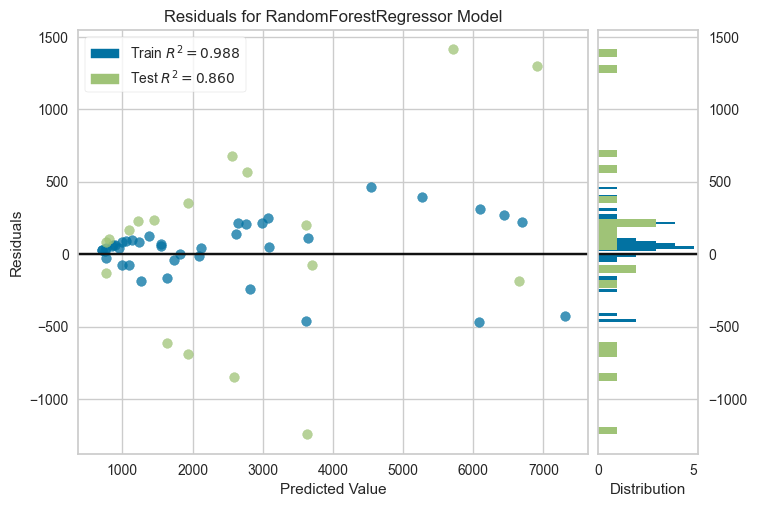

In [35]:
plot_model(best, plot = 'residuals')

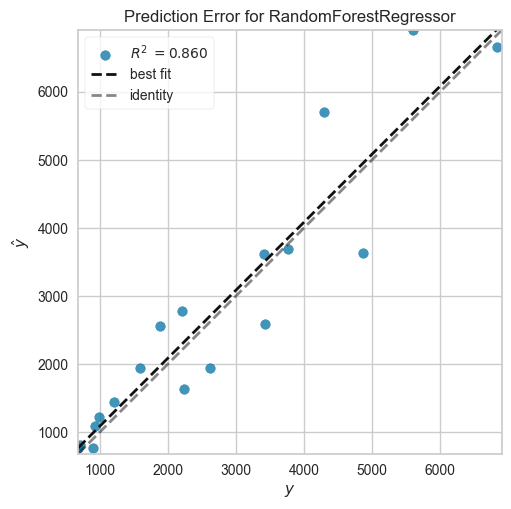

In [36]:
plot_model(best, plot = 'error')

### ARIMA MODEL

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA


In [11]:
data


,Oil Production
Date,
2005-01-01,8045.2
2005-02-01,9243.7
2005-03-01,7498.1
2005-04-01,6840.4
2005-05-01,6470.0
...,...
2009-09-01,727.9
2009-10-01,797.7
2009-11-01,685.8


<AxesSubplot: xlabel='Date'>

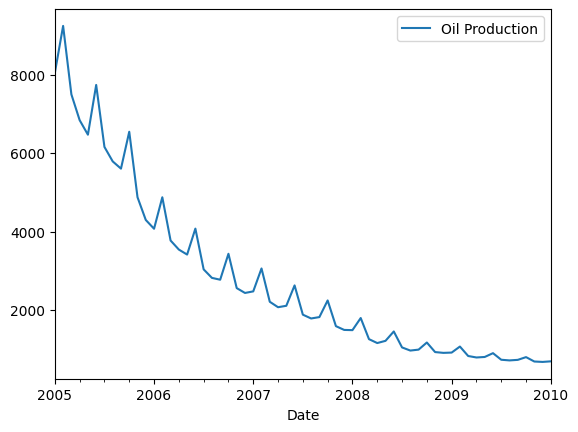

In [12]:
data.plot()

In [19]:
s= adfuller(data.dropna())

In [20]:
s

(-2.4448360381972325,
 0.1294794312183879,
 10,
 50,
 {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616},
 528.1431261586829)

In [21]:
s[1]

0.1294794312183879

In [22]:
if s[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

Data is not stationary


<AxesSubplot: xlabel='Date'>

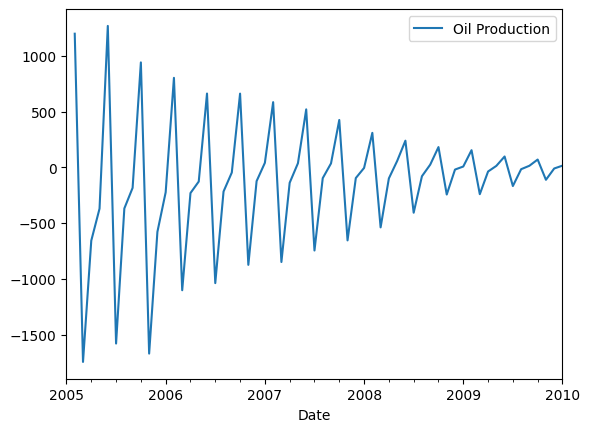

In [23]:
data.diff().plot()

In [25]:
s= adfuller(data.diff().dropna())

In [26]:
if s[1] < 0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

Data is stationary


d = 1

q value: PACF

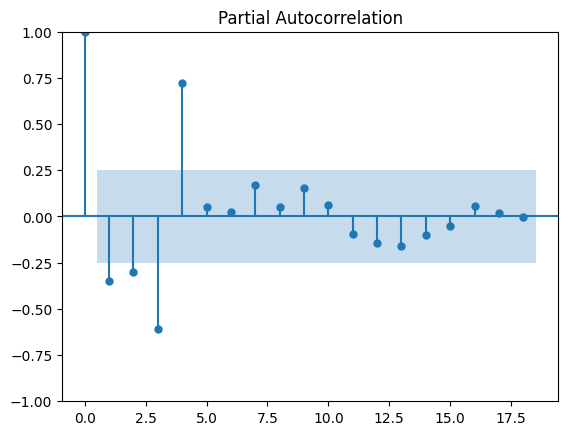

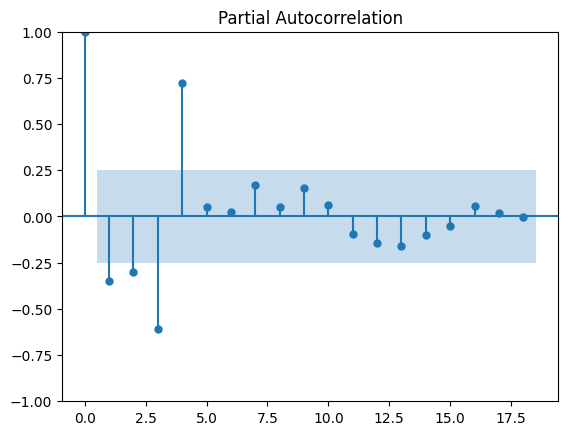

In [27]:
plot_pacf(data.diff().dropna())

P = 4 

q 

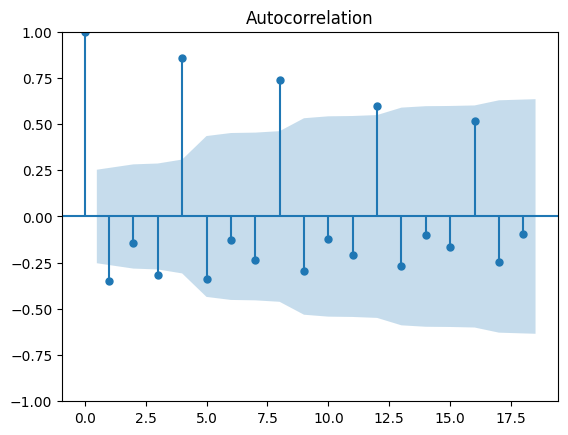

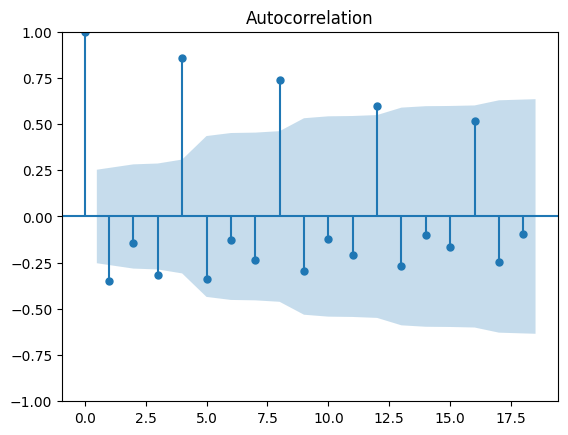

In [28]:
plot_acf(data.diff().dropna())

q =1 

d =1 , p = 4, q = 1

In [30]:
import statsmodels.api as sm


In [31]:
model = sm.tsa.arima.ARIMA(data,order=(4,1,1))

C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [35]:
result = model.fit()

C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         Oil Production   No. Observations:                   61
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -393.761
Date:                Sat, 03 Aug 2024   AIC                            799.522
Time:                        22:53:22   BIC                            812.088
Sample:                    01-01-2005   HQIC                           804.437
                         - 01-01-2010                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0378      0.021     -1.773      0.076      -0.080       0.004
ar.L2         -0.0107      0.011     -0.962      0.336      -0.032       0.011
ar.L3         -0.0164      0.023     -0.707      0.479      -0.062       0.029
ar.L4          0.9411      0.018     53.551      0.000       0.907       0.975
ma.L1          0.2463      0.148      1.666      0.096      -0.043       0.536
sigma2      1.699e+04   2110.187      8.050      0.000    1.29e+04    2.11e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                39.54
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.05   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
residuals = result.resid    

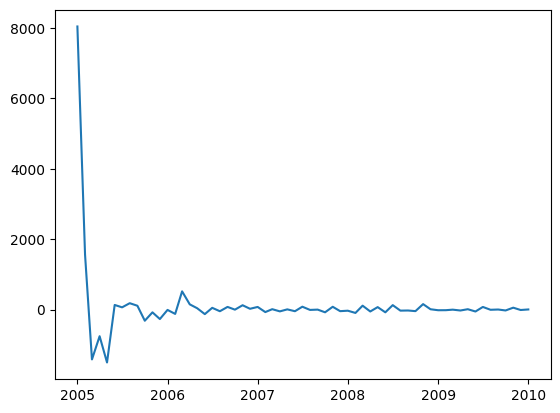

In [38]:
plt.plot(residuals)

In [40]:
result.forecast()

2010-02-01    758.278032
Freq: MS, dtype: float64

In [41]:
data 

,Oil Production
Date,
2005-01-01,8045.2
2005-02-01,9243.7
2005-03-01,7498.1
2005-04-01,6840.4
2005-05-01,6470.0
...,...
2009-09-01,727.9
2009-10-01,797.7
2009-11-01,685.8


In [42]:
test = data[-10:]

In [43]:

test 

,Oil Production
Date,
2009-04-01,788.6
2009-05-01,801.5
2009-06-01,898.6
2009-07-01,730.7
2009-08-01,713.9
2009-09-01,727.9
2009-10-01,797.7
2009-11-01,685.8
2009-12-01,675.3


In [44]:
predictions = []

In [48]:
d = list(data["Oil Production"])

In [49]:
for t in range(len(test)):
    model = sm.tsa.arima.ARIMA(d, order=(4,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    print(yhat)
    predictions.append(yhat)
    data = d.append(yhat)

C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


758.2780322982858


C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


650.1271309341602


C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


642.6352119978841


C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


657.7123100242021


C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


722.56619826174


C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


617.460861445545


C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


611.285822337192


C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


625.6779007479822


C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


687.8360065890446
585.5685299698322


C:\Users\Z004ET6Z\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
predictions

[758.2780322982858]

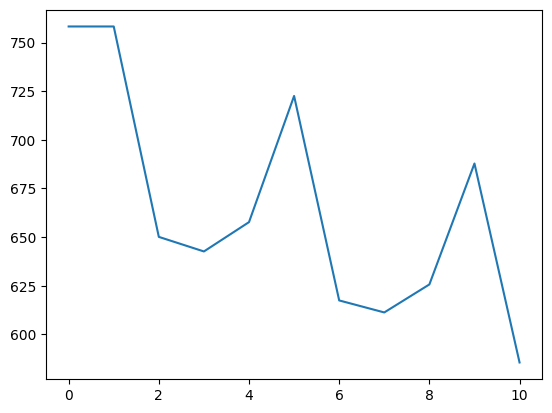

In [51]:
plt.plot(predictions)

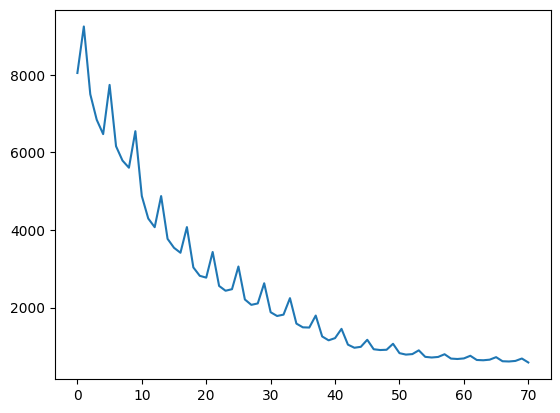

In [52]:
plt.plot(d)

In [55]:
index_t = list(range(len(d)-9,len(d)-9+len(predictions)))

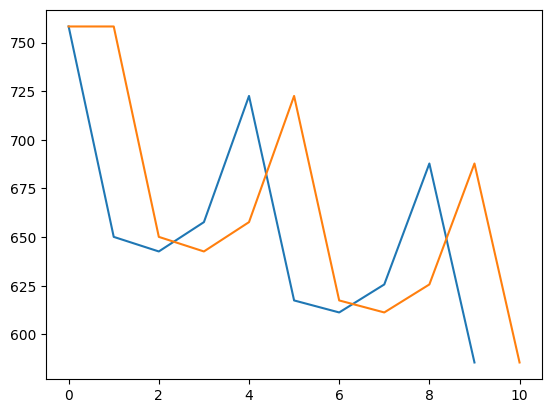

In [60]:
plt.plot(d[-10:])
plt.plot(predictions)